In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn import tree
%matplotlib inline

Weak learner 0 R^2: -21.86595826514709
Weak learner 20 R^2: -0.0026192923008196978
Weak learner 40 R^2: -0.0016748172727345523
Weak learner 60 R^2: -0.0014818633549413818
Weak learner 80 R^2: -0.0012578370480087475
Weak learner 100 R^2: -0.0007136861925911564


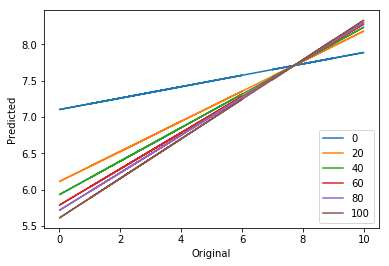

Overall R^2:
0.5282873581794293


In [7]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

y = df['happy']
X = df.loc[:,~df.columns.isin(['happy','cntry'])]
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

preds = pd.DataFrame()
labels = []
           
uniquex = df['happy'].unique()
           
for m in range (0,101):
    decision_tree = tree.DecisionTreeRegressor(max_depth=2)
    decision_tree.fit(X, y)
    
    pred = decision_tree.predict(X)
    preds['pred{}'.format(m)] = pred
    
    y = y-pred
    
    if m % 20 == 0:
        print('Weak learner {} R^2: {}'.format(m, decision_tree.score(X,y)))
        labels = labels+[m]
        bestpred = preds.sum(axis=1)
        plt.plot(uniquex, np.poly1d(np.polyfit(df['happy'], bestpred, 1))(uniquex))

plt.legend(labels)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.show()
predicted = preds.sum(axis=1)

print('Overall R^2:')
print(np.corrcoef(df['happy'], predicted)[0,1])